# Linear Mixed Models

In [2]:
library(nlme)
library(ggplot2)
library(gridExtra)
library(dplyr)

In [3]:
# Reading the individual abundance file
data<-read.csv("LME_akkermansia.csv",check.names=FALSE)
data

Subject,Abund,Treat,Time,Individual,OTU_name
<fct>,<dbl>,<fct>,<int>,<int>,<fct>
C01P1A,0.006123452,P,1,1,Akkermansia
C02P1A,0.252290654,P,1,2,Akkermansia
C03P1B,0.017700284,P,1,3,Akkermansia
C04P1B,0.010716133,P,1,4,Akkermansia
C05P1C,0.011291257,P,1,5,Akkermansia
C06P1C,0.046034169,P,1,6,Akkermansia
C07P1D,0.016510373,P,1,7,Akkermansia
C08P1D,0.025334985,P,1,8,Akkermansia
C09P1E,0.229184188,P,1,9,Akkermansia


In [4]:
# Split the data by bacteria
mylist <- split(data, data$OTU_name)

## Akkermansia

In [5]:
# Here we are trying to find which model fits the data best by trying different equations
pdf("~/LME_test1.pdf",width = 6, height = 5)
fm_akker <- lme(rank(Abund) ~ Time * Treat ,data = mylist$Akkermansia, random = ~ 1|Individual)
    print(summary(fm_akker))
    newdat <- expand.grid(Treat=unique(mylist$Akkermansia),
                      Time=c(min(mylist$Akkermansia$Time),
                            max(mylist$Akkermansia$Time)))


    p_akker <- ggplot(mylist$Akkermansia, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Akkermansia") +
          geom_line(aes(y=predict(fm_akker), group=Individual))
    print(p_akker)
dev.off()

Linear mixed-effects model fit by REML
 Data: mylist$Akkermansia 
       AIC      BIC    logLik
  932.0452 947.3685 -460.0226

Random effects:
 Formula: ~1 | Individual
        (Intercept) Residual
StdDev:    8.463085 27.01576

Fixed effects: rank(Abund) ~ Time * Treat 
               Value Std.Error DF   t-value p-value
(Intercept) 42.58000  9.351258 77  4.553398  0.0000
Time         4.18000  2.701576 77  1.547245  0.1259
TreatP      10.40908 13.227705 18  0.786915  0.4416
Time:TreatP -6.96908  3.831079 77 -1.819092  0.0728
 Correlation: 
            (Intr) Time   TreatP
Time        -0.867              
TreatP      -0.707  0.613       
Time:TreatP  0.611 -0.705 -0.866

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.72462688 -0.82901326 -0.04576368  0.79942622  1.89585503 

Number of Observations: 99
Number of Groups: 20 


png 
  2

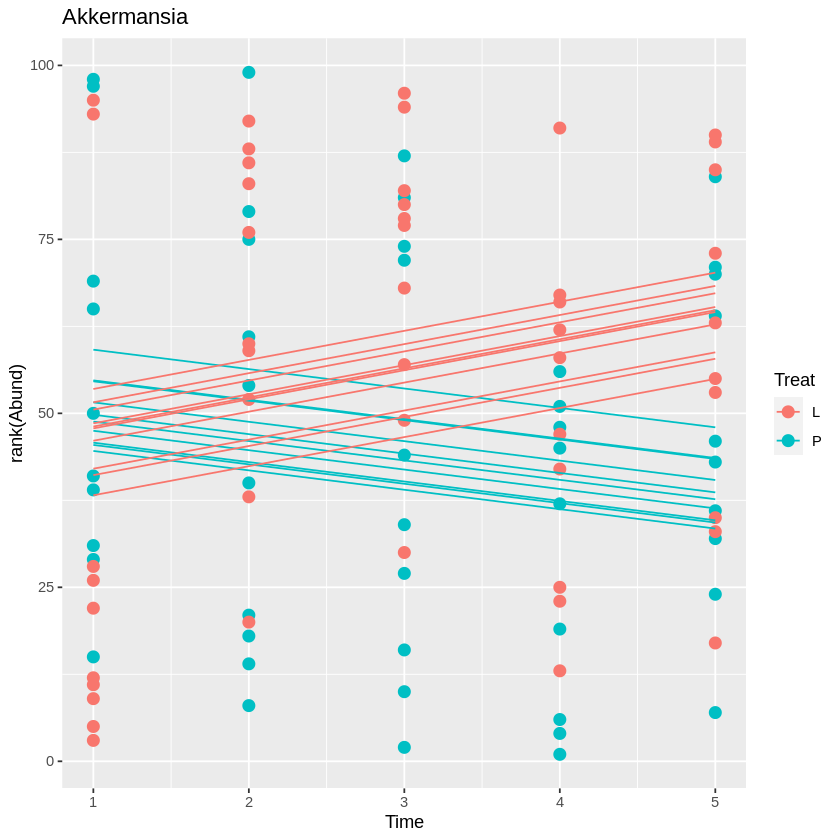

In [6]:
p_akker

In [7]:
pdf("~/LME_test3.pdf",width = 6, height = 5)
fm_akker <- lme(rank(Abund) ~ I(Time-3) * Treat ,data = mylist$Akkermansia, random = ~ 1|Individual)
    print(summary(fm_akker))
    newdat <- expand.grid(Treat=unique(mylist$Akkermansia),
                      Time=c(min(mylist$Akkermansia$Time),
                            max(mylist$Akkermansia$Time)))


    p_akker <- ggplot(mylist$Akkermansia, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Akkermansia") +
          geom_line(aes(y=predict(fm_akker), group=Individual))
    print(p_akker)
dev.off()

Linear mixed-effects model fit by REML
 Data: mylist$Akkermansia 
       AIC      BIC    logLik
  932.0452 947.3685 -460.0226

Random effects:
 Formula: ~1 | Individual
        (Intercept) Residual
StdDev:    8.463085 27.01576

Fixed effects: rank(Abund) ~ I(Time - 3) * Treat 
                       Value Std.Error DF   t-value p-value
(Intercept)         55.12000  4.664698 77 11.816414  0.0000
I(Time - 3)          4.18000  2.701576 77  1.547245  0.1259
TreatP             -10.49817  6.621130 18 -1.585555  0.1303
I(Time - 3):TreatP  -6.96908  3.831079 77 -1.819092  0.0728
 Correlation: 
                   (Intr) I(Tm-3) TreatP
I(Time - 3)         0.000               
TreatP             -0.705  0.000        
I(Time - 3):TreatP  0.000 -0.705   0.006

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.72462688 -0.82901326 -0.04576368  0.79942622  1.89585503 

Number of Observations: 99
Number of Groups: 20 


png 
  2

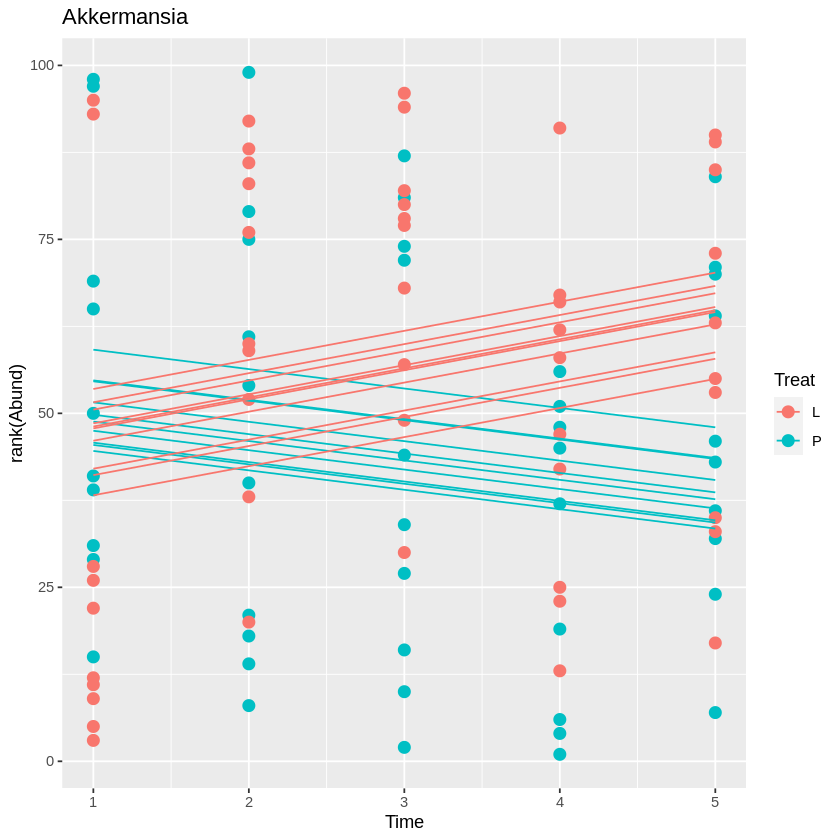

In [8]:
p_akker

In [9]:
pdf("~/LME_test2.pdf",width = 6, height = 5)
fm_akker <- lme(rank(Abund) ~ I((Time)^2) * Treat ,data = mylist$Akkermansia, random = ~ 1|Individual)
    print(summary(fm_akker))
    newdat <- expand.grid(Treat=unique(mylist$Akkermansia),
                      Time=c(min(mylist$Akkermansia$Time),
                            max(mylist$Akkermansia$Time)))


    p_akker <- ggplot(mylist$Akkermansia, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Akkermansia") +
          geom_line(aes(y=predict(fm_akker), group=Individual))
    print(p_akker)
dev.off()

Linear mixed-effects model fit by REML
 Data: mylist$Akkermansia 
       AIC      BIC    logLik
  940.9948 956.3181 -464.4974

Random effects:
 Formula: ~1 | Individual
        (Intercept) Residual
StdDev:      8.2394 27.32159

Fixed effects: rank(Abund) ~ I((Time)^2) * Treat 
                      Value Std.Error DF   t-value p-value
(Intercept)        50.02588  6.772638 77  7.386469  0.0000
I((Time)^2)         0.46310  0.446756 77  1.036588  0.3032
TreatP             -1.51868  9.579148 18 -0.158540  0.8758
I((Time)^2):TreatP -0.81381  0.632958 77 -1.285722  0.2024
 Correlation: 
                   (Intr) I((Tm)^2) TreatP
I((Time)^2)        -0.726                 
TreatP             -0.707  0.513          
I((Time)^2):TreatP  0.512 -0.706    -0.723

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.83289978 -0.78955048 -0.01400919  0.84887487  1.94160001 

Number of Observations: 99
Number of Groups: 20 


png 
  2

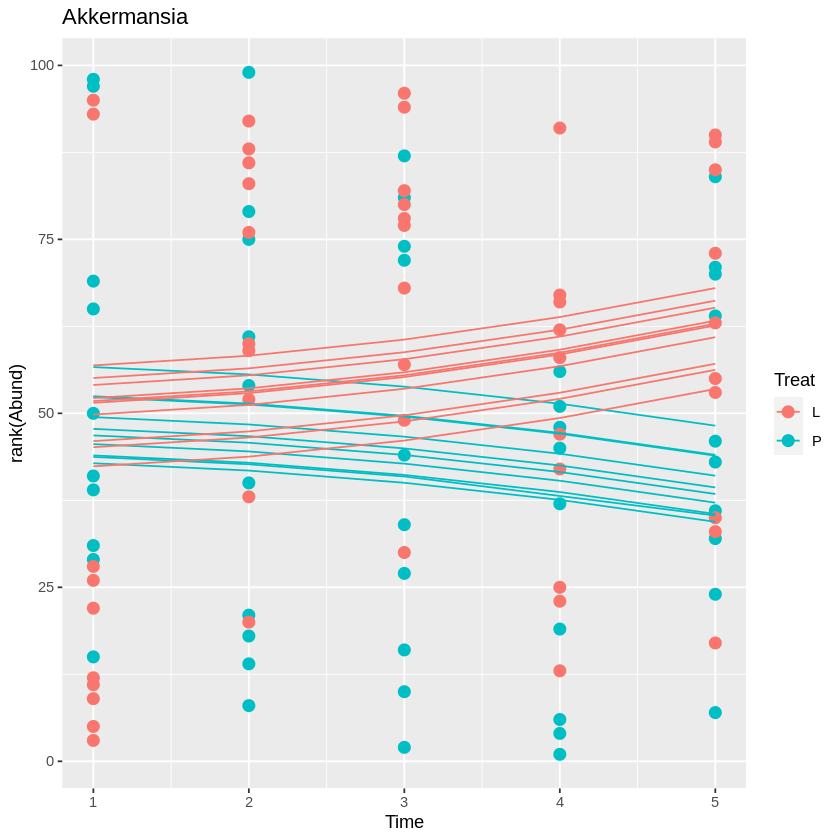

In [10]:
p_akker

In [11]:
pdf("~/LME_test4.pdf",width = 6, height = 5)
fm_akker <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Akkermansia, random = ~ 1|Individual)
    print(summary(fm_akker))
    newdat <- expand.grid(Treat=unique(mylist$Akkermansia),
                      Time=c(min(mylist$Akkermansia$Time),
                            max(mylist$Akkermansia$Time)))


    p_akker <- ggplot(mylist$Akkermansia, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Akkermansia") +
          geom_line(aes(y=predict(fm_akker), group=Individual))
    print(p_akker)
dev.off()

Linear mixed-effects model fit by REML
 Data: mylist$Akkermansia 
       AIC      BIC    logLik
  928.9651 944.2884 -458.4826

Random effects:
 Formula: ~1 | Individual
        (Intercept) Residual
StdDev:    8.863614 26.36586

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             66.20571  6.451450 77 10.262146  0.0000
I((Time - 3)^2)         -5.54286  2.228322 77 -2.487458  0.0150
TreatP                 -26.66175  9.172922 18 -2.906572  0.0094
I((Time - 3)^2):TreatP   8.07953  3.157515 77  2.558826  0.0125
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.691                   
TreatP                 -0.703  0.486            
I((Time - 3)^2):TreatP  0.488 -0.706      -0.692

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.69946142 -0.74623036 -0.06355825  0.74760346  2.10155085 

Number of Observations: 99

png 
  2

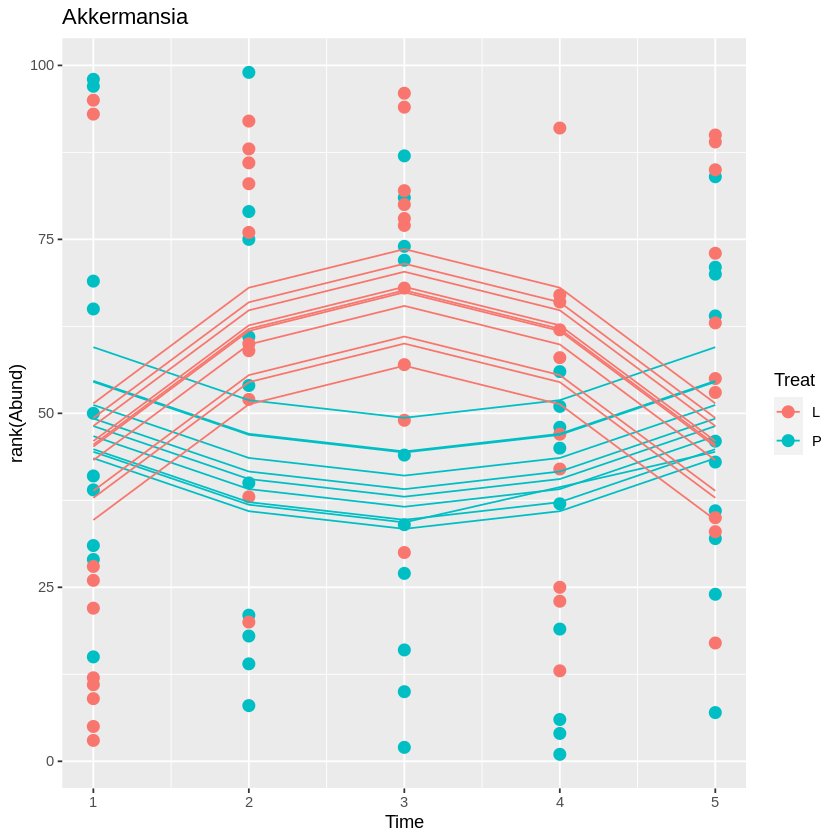

In [12]:
p_akker

#As we can see that a quadratics formula was giving the best fit for the data 
#Hence this was used for all bacteria in the dataset

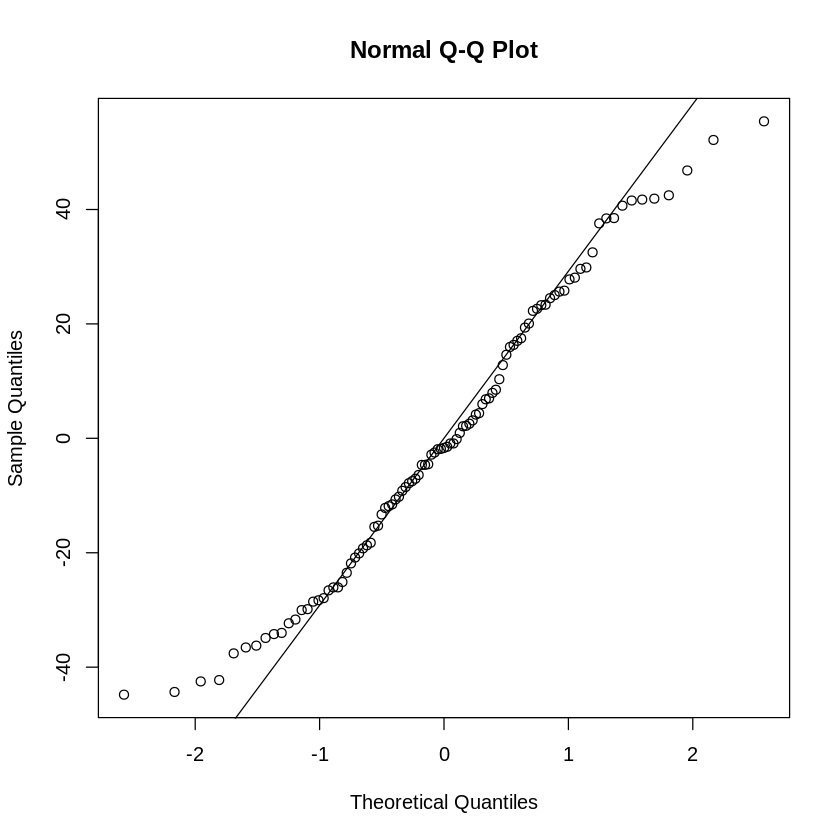

In [26]:
#Checking normality of the data
qqnorm(resid(fm_akker))
qqline(resid(fm_akker))

## Bifidobacterium

Linear mixed-effects model fit by REML
 Data: mylist$Bifidobacterium 
       AIC      BIC    logLik
  920.5196 940.9506 -452.2598

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             20.93186 (Intr)
1 | I((Time - 3)^2)TRUE 21.21947 -0.896
Residual                24.40300       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             71.94857  6.177267 77 11.647315  0.0000
I((Time - 3)^2)         -5.61429  2.062430 77 -2.722171  0.0080
TreatP                 -33.43122  8.780664 18 -3.807369  0.0013
I((Time - 3)^2):TreatP   5.85234  2.922535 77  2.002487  0.0488
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.668                   
TreatP                 -0.704  0.470            
I((Time - 3)^2):TreatP  0.471 -0.706      -0

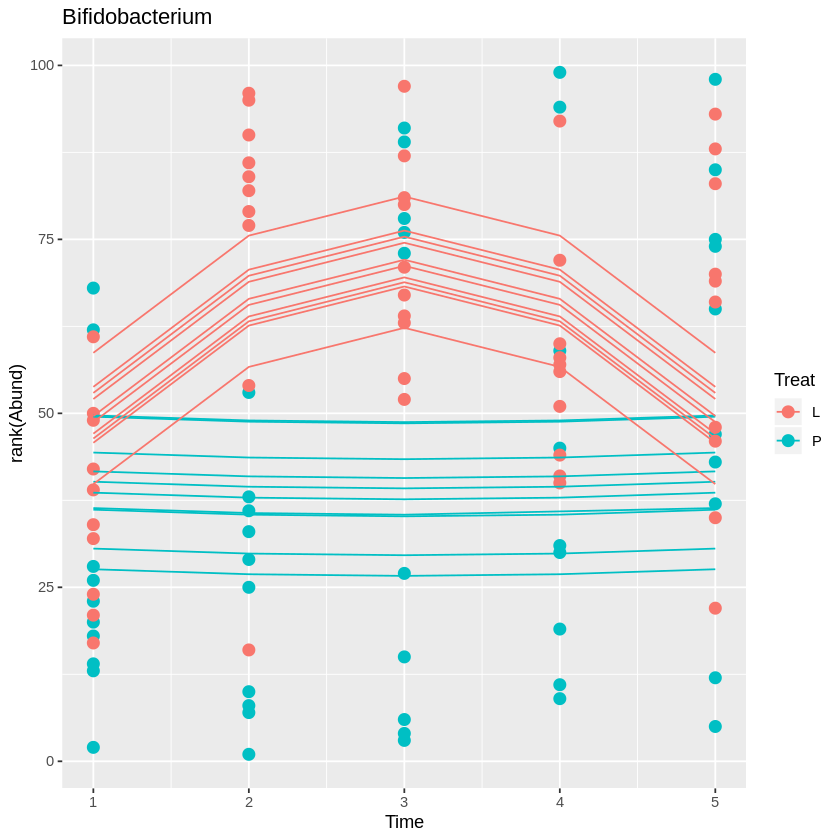

In [27]:
fm_bifido <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Bifidobacterium, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_bifido))
    newdat <- expand.grid(Treat=unique(mylist$Bifidobacterium),
                      Time=c(min(mylist$Bifidobacterium$Time),
                            max(mylist$Bifidobacterium$Time)))


    p_bifido <- ggplot(mylist$Bifidobacterium, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Bifidobacterium") +
          geom_line(aes(y=predict(fm_bifido), group=Individual))
    print(p_bifido)

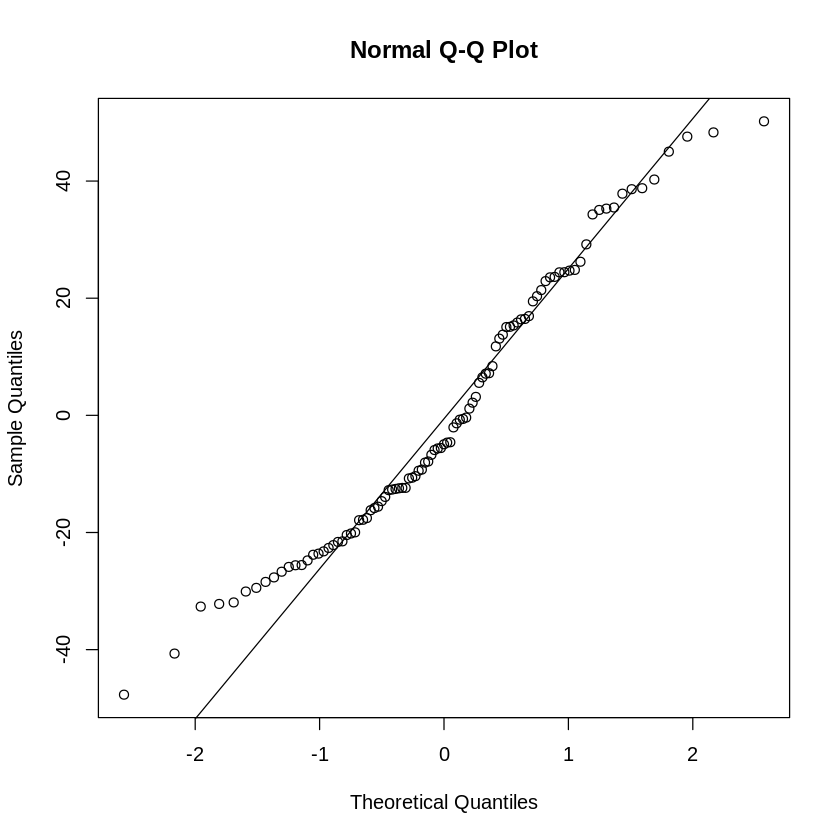

In [28]:
qqnorm(resid(fm_bifido))
qqline(resid(fm_bifido))

## Coprococcus

Linear mixed-effects model fit by REML
 Data: mylist$Coprococcus 
       AIC      BIC    logLik
  923.9945 944.4255 -453.9972

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             21.43306 (Intr)
1 | I((Time - 3)^2)TRUE 21.44031 -0.817
Residual                24.11561       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             65.59429  6.711800 77  9.772980  0.0000
I((Time - 3)^2)         -2.95714  2.038141 77 -1.450902  0.1509
TreatP                 -26.83440  9.533388 18 -2.814781  0.0115
I((Time - 3)^2):TreatP   3.50300  2.888301 77  1.212824  0.2289
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.607                   
TreatP                 -0.704  0.428            
I((Time - 3)^2):TreatP  0.429 -0.706      -0.609

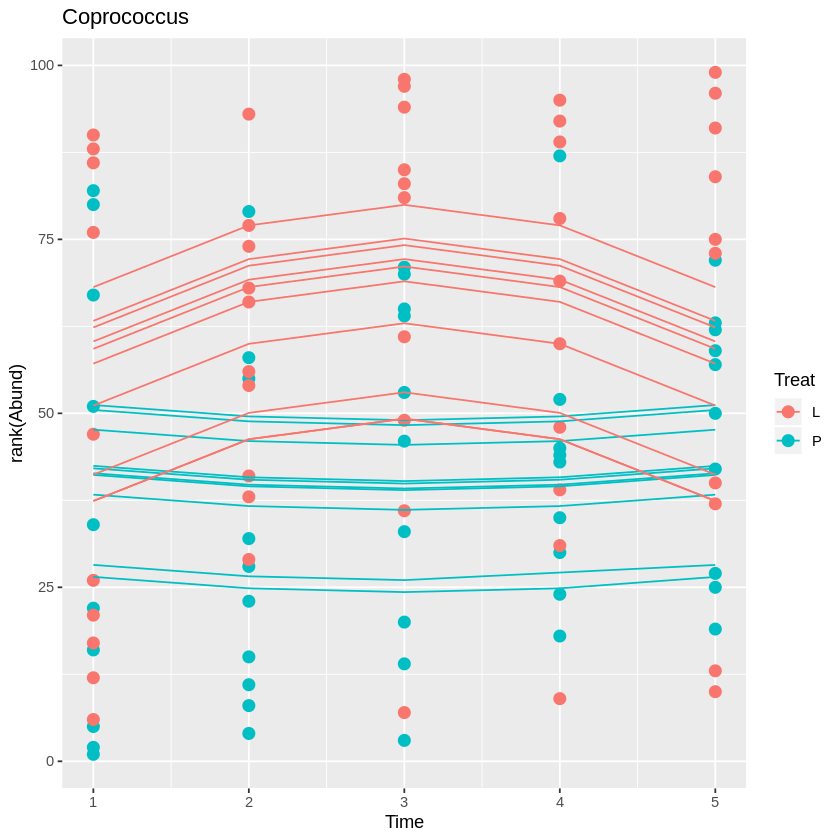

In [29]:
fm_copro <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Coprococcus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_copro))
    newdat <- expand.grid(Treat=unique(mylist$Coprococcus),
                      Time=c(min(mylist$Coprococcus$Time),
                            max(mylist$Coprococcus$Time)))


    p_copro <- ggplot(mylist$Coprococcus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Coprococcus") +
          geom_line(aes(y=predict(fm_copro), group=Individual))
    print(p_copro)

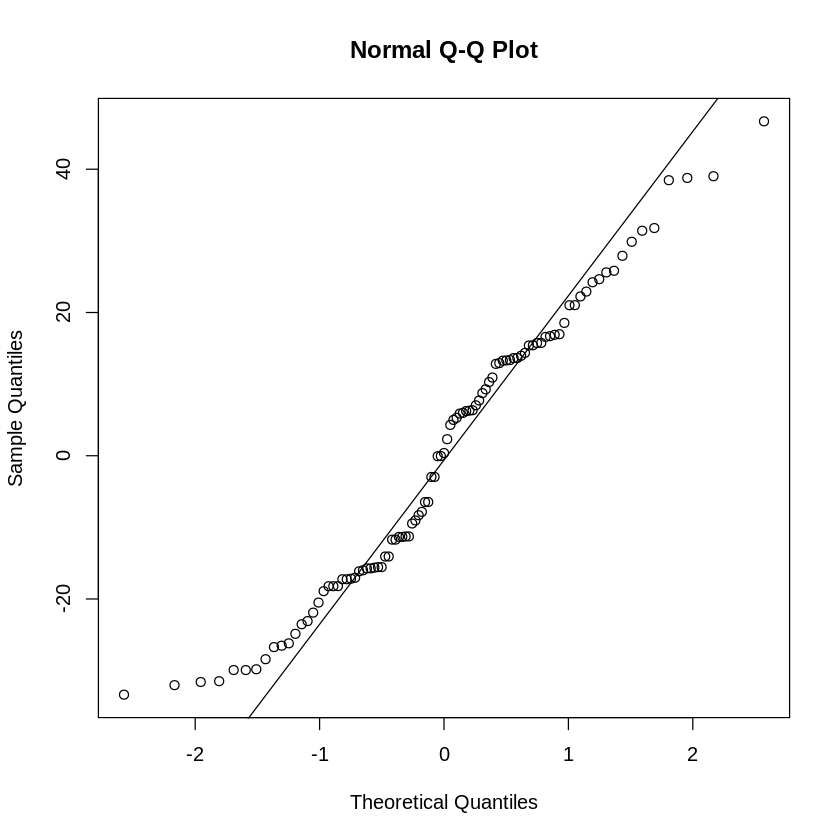

In [13]:
pp = qqnorm(resid(fm_copro))
pq = qqline(resid(fm_copro))

## Allobaculum

Linear mixed-effects model fit by REML
 Data: mylist$Allobaculum 
       AIC      BIC    logLik
  890.1907 910.6217 -437.0953

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             18.61356 (Intr)
1 | I((Time - 3)^2)TRUE 18.61356 -0.356
Residual                18.08537       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             63.48571  7.777955 77  8.162263  0.0000
I((Time - 3)^2)         -1.99286  1.528492 77 -1.303806  0.1962
TreatP                 -24.70207 11.021090 18 -2.241345  0.0378
I((Time - 3)^2):TreatP   2.68376  2.166341 77  1.238847  0.2192
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.393                   
TreatP                 -0.706  0.277            
I((Time - 3)^2):TreatP  0.277 -0.706      -0.396

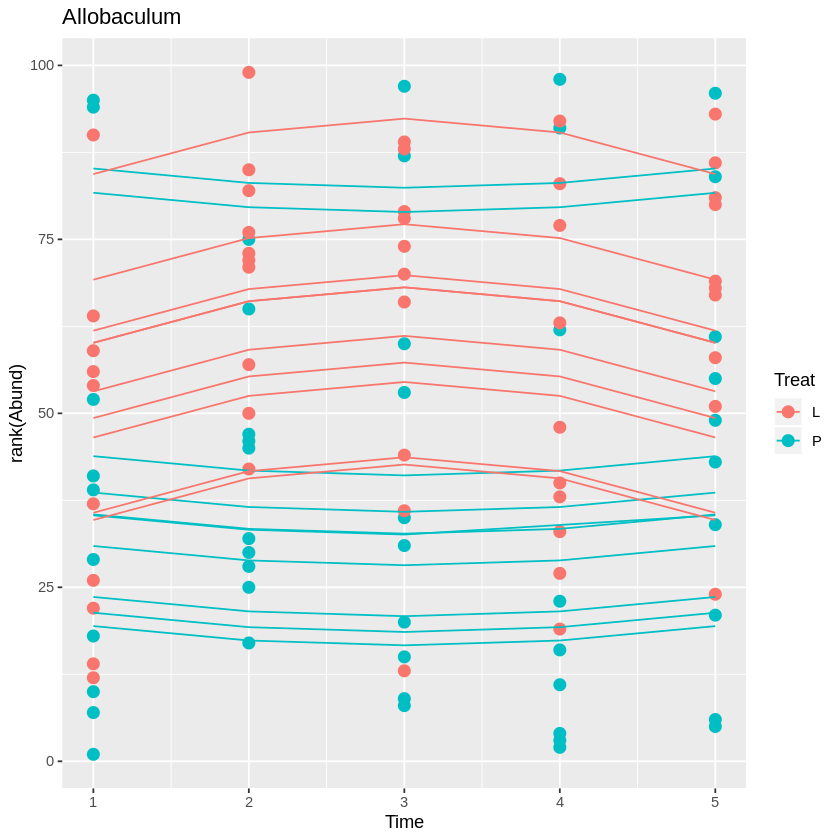

In [30]:
fm_allo <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Allobaculum, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_allo))
    newdat <- expand.grid(Treat=unique(mylist$Allobaculum),
                      Time=c(min(mylist$Allobaculum$Time),
                            max(mylist$Allobaculum$Time)))


    p_allo <- ggplot(mylist$Allobaculum, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Allobaculum") +
          geom_line(aes(y=predict(fm_allo), group=Individual))
    print(p_allo)

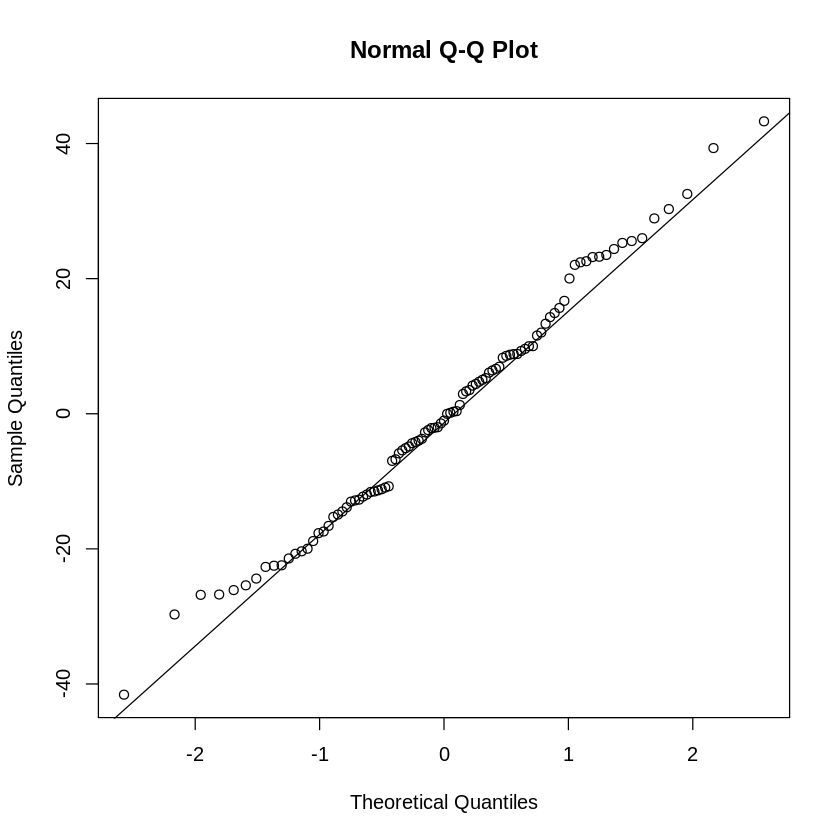

In [15]:
qqnorm(resid(fm_allo))
qqline(resid(fm_allo))

## Ruminococcus

Linear mixed-effects model fit by REML
 Data: mylist$Ruminococcus 
       AIC      BIC    logLik
  929.1065 949.5376 -456.5533

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             21.98007 (Intr)
1 | I((Time - 3)^2)TRUE 21.98007 -0.74 
Residual                24.19218       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                          Value Std.Error DF   t-value p-value
(Intercept)            49.27143  7.315771 77  6.734961  0.0000
I((Time - 3)^2)         2.46429  2.044612 77  1.205258  0.2318
TreatP                 -1.37671 10.385099 18 -0.132566  0.8960
I((Time - 3)^2):TreatP -3.64235  2.897586 77 -1.257030  0.2125
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.559                   
TreatP                 -0.704  0.394            
I((Time - 3)^2):TreatP  0.394 -0.706      -0.561

St

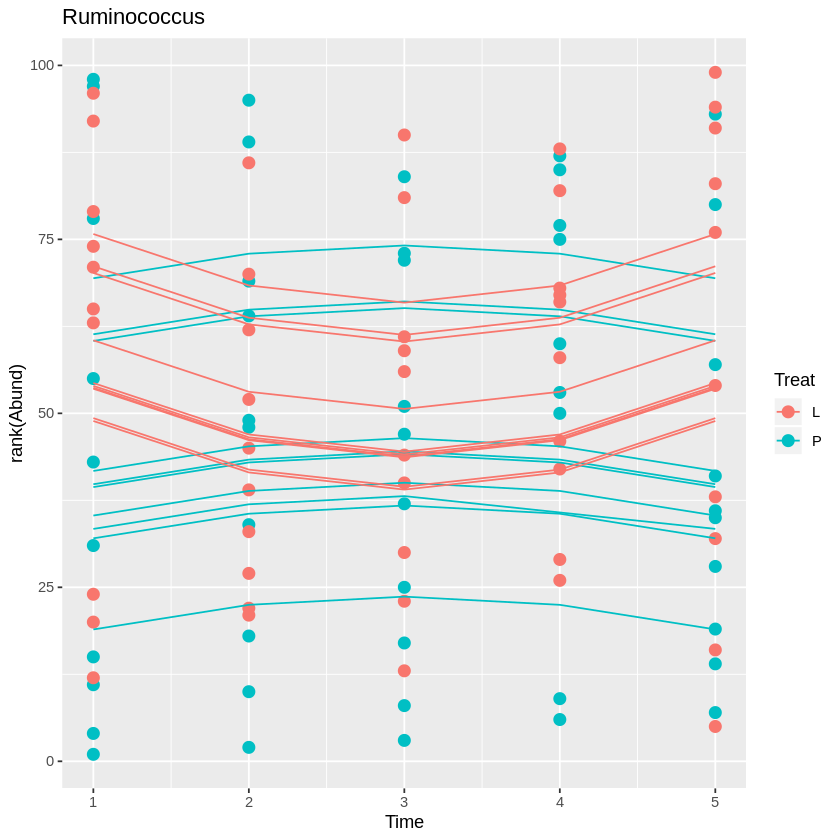

In [31]:
fm_rumino <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Ruminococcus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_rumino))
    newdat <- expand.grid(Treat=unique(mylist$Ruminococcus),
                      Time=c(min(mylist$Ruminococcus$Time),
                            max(mylist$Ruminococcus$Time)))


    p_rumino <- ggplot(mylist$Ruminococcus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Ruminococcus") +
          geom_line(aes(y=predict(fm_rumino), group=Individual))
    print(p_rumino)

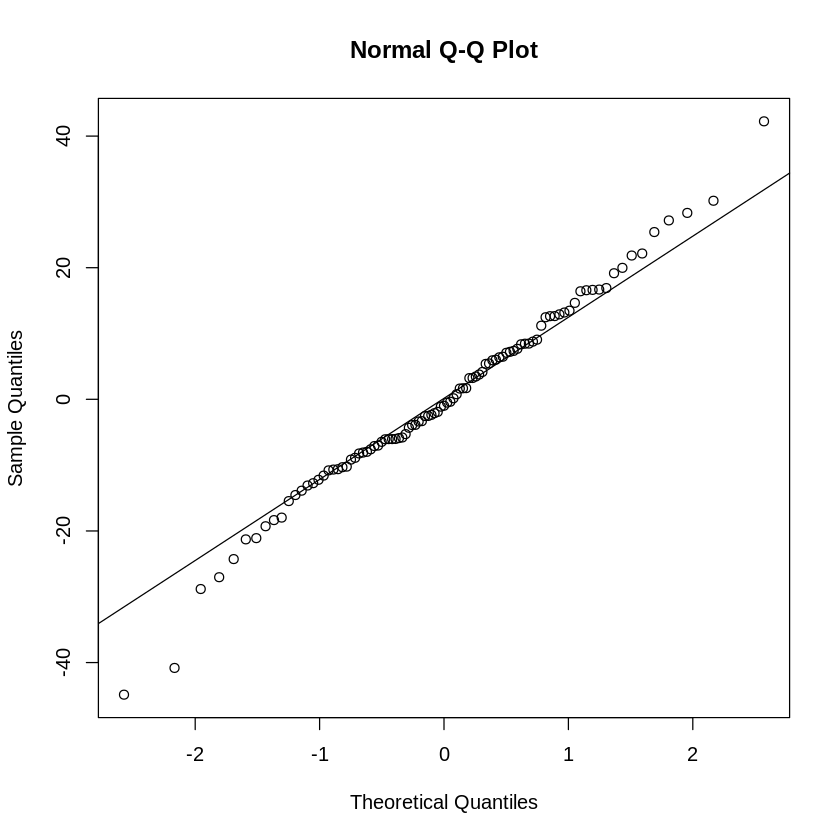

In [17]:
qqnorm(resid(fm_rumino))
qqline(resid(fm_rumino))

## S24-7

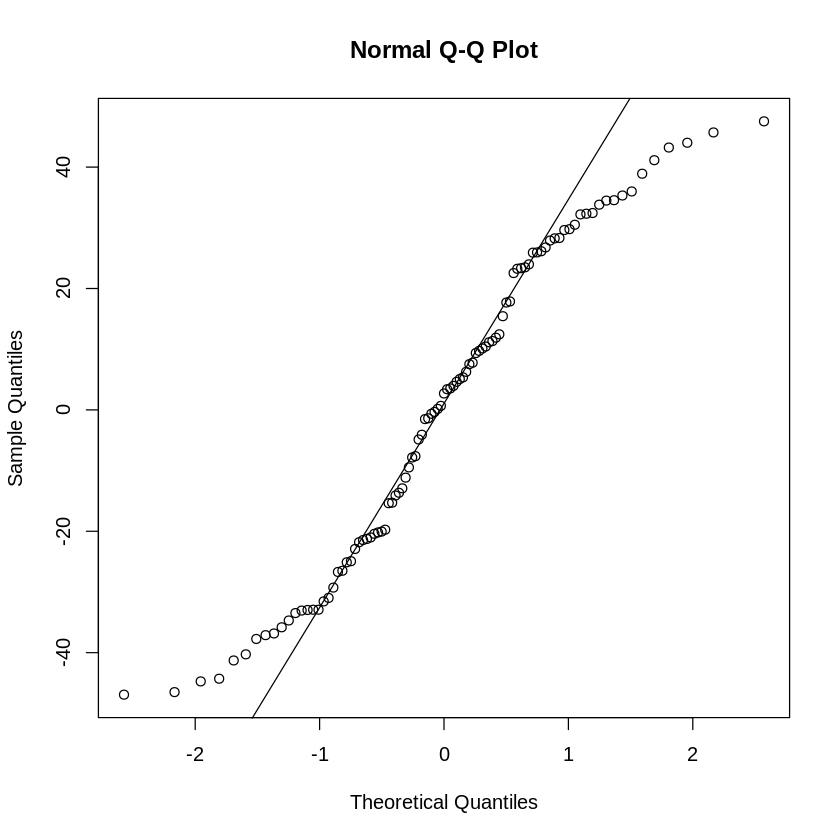

In [28]:
qqnorm(resid(fm_s24))
qqline(resid(fm_s24))

Linear mixed-effects model fit by REML
 Data: mylist$`S24-7` 
       AIC      BIC    logLik
  940.6368 961.0678 -462.3184

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             20.73872 (Intr)
1 | I((Time - 3)^2)TRUE 22.07224 -0.936
Residual                27.76246       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             52.03714  6.590132 77  7.896221  0.0000
I((Time - 3)^2)         -0.07857  2.346356 77 -0.033487  0.9734
TreatP                 -11.40097  9.372399 18 -1.216441  0.2395
I((Time - 3)^2):TreatP   3.78354  3.324666 77  1.138020  0.2586
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.712                   
TreatP                 -0.703  0.501            
I((Time - 3)^2):TreatP  0.503 -0.706      -0.713

St

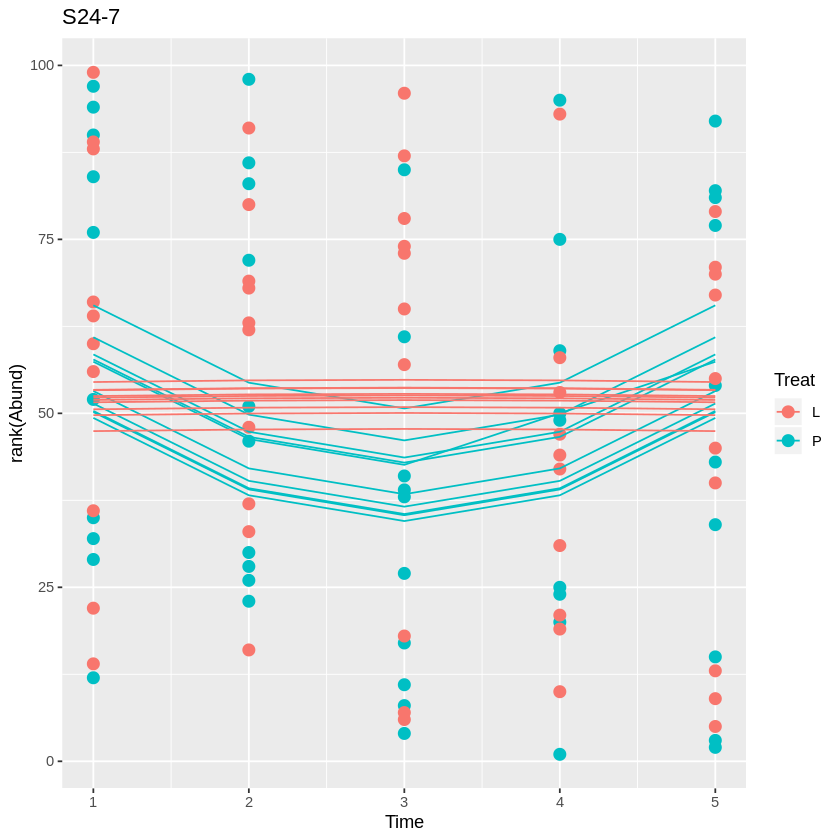

In [32]:
fm_s24 <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$`S24-7`, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_s24))
    newdat <- expand.grid(Treat=unique(mylist$`S24-7`),
                      Time=c(min(mylist$`S24-7`$Time),
                            max(mylist$`S24-7`$Time)))


    p_s24 <- ggplot(mylist$`S24-7`, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("S24-7") +
          geom_line(aes(y=predict(fm_s24), group=Individual))
    print(p_s24)

## Lactobaccillus

Linear mixed-effects model fit by REML
 Data: mylist$Lactobaccillus 
       AIC      BIC    logLik
  938.3192 958.7502 -461.1596

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             22.85141 (Intr)
1 | I((Time - 3)^2)TRUE 23.30483 -0.898
Residual                26.82746       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                          Value Std.Error DF   t-value p-value
(Intercept)            47.88571  6.770322 77  7.072886  0.0000
I((Time - 3)^2)         1.15714  2.267335 77  0.510354  0.6113
TreatP                 11.34462  9.623898 18  1.178797  0.2538
I((Time - 3)^2):TreatP -5.69263  3.212884 77 -1.771813  0.0804
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.670                   
TreatP                 -0.703  0.471            
I((Time - 3)^2):TreatP  0.473 -0.706      -0.671



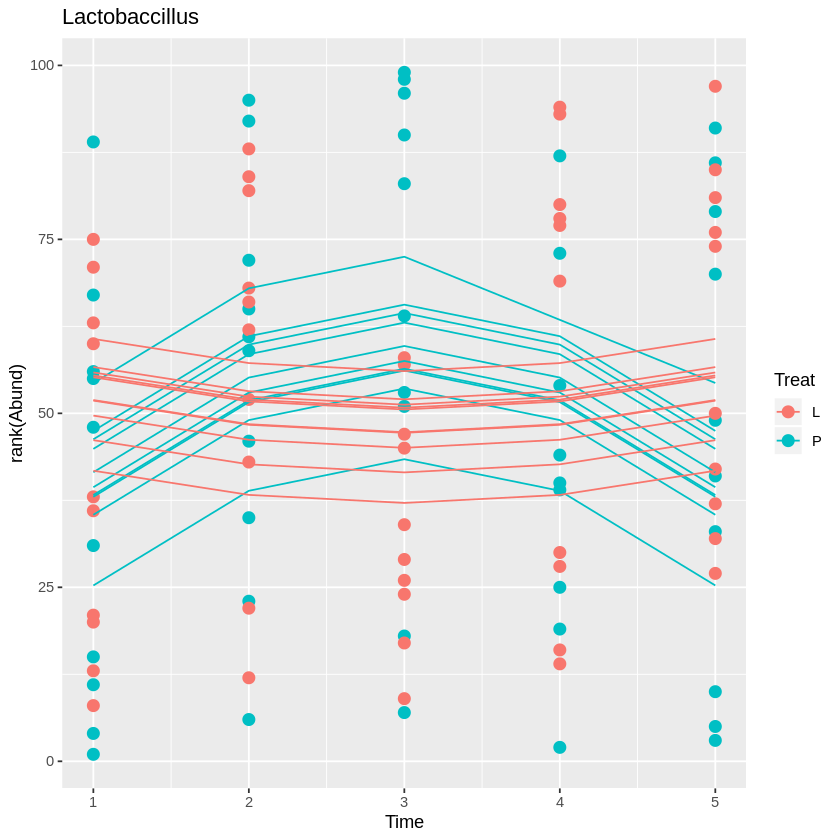

In [33]:
fm_lacto <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Lactobaccillus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_lacto))
    newdat <- expand.grid(Treat=unique(mylist$Lactobaccillus),
                      Time=c(min(mylist$Lactobaccillus$Time),
                            max(mylist$Lactobaccillus$Time)))


    p_lacto <- ggplot(mylist$Lactobaccillus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Lactobaccillus") +
          geom_line(aes(y=predict(fm_lacto), group=Individual))
    print(p_lacto)

## Lachnospiraceae

Linear mixed-effects model fit by REML
 Data: mylist$Lachnospiraceae 
       AIC      BIC    logLik
  936.9978 957.4288 -460.4989

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             20.37576 (Intr)
1 | I((Time - 3)^2)TRUE 21.75016 -0.934
Residual                27.20552       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             60.47143  6.476841 77  9.336562  0.0000
I((Time - 3)^2)         -1.88571  2.299286 77 -0.820130  0.4147
TreatP                 -15.19582  9.211062 18 -1.649736  0.1163
I((Time - 3)^2):TreatP   0.77830  3.257980 77  0.238889  0.8118
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.710                   
TreatP                 -0.703  0.499            
I((Time - 3)^2):TreatP  0.501 -0.706      -0

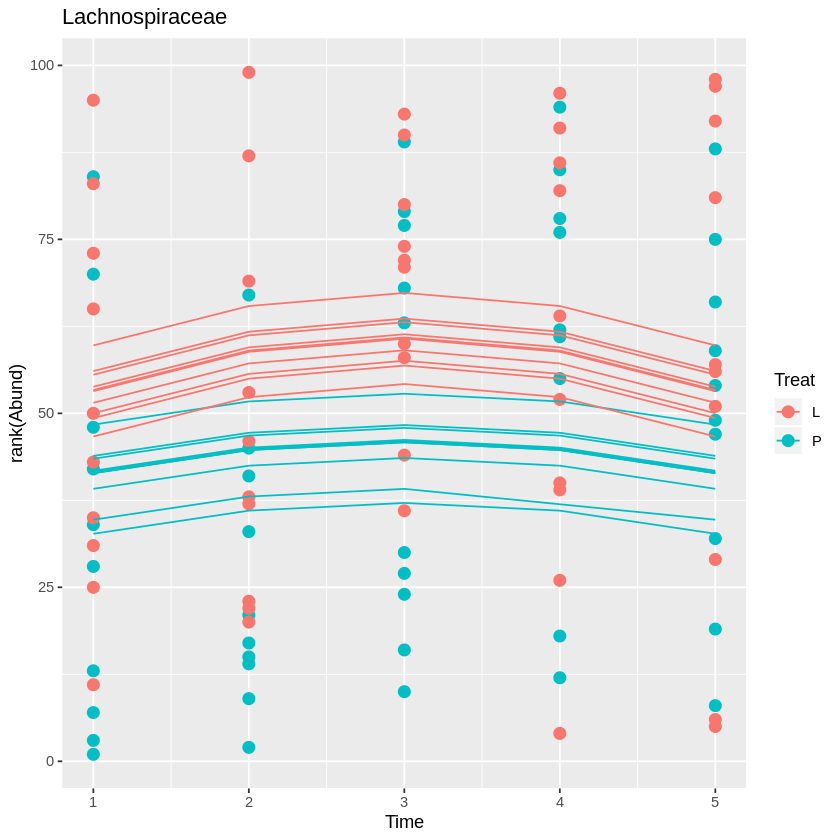

In [34]:
fm_lachno <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Lachnospiraceae, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_lachno))
    newdat <- expand.grid(Treat=unique(mylist$Lachnospiraceae),
                      Time=c(min(mylist$Lachnospiraceae$Time),
                            max(mylist$Lachnospiraceae$Time)))


    p_lachno <- ggplot(mylist$Lachnospiraceae, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Lachnospiraceae") +
          geom_line(aes(y=predict(fm_lachno), group=Individual))
    print(p_lachno)

## Rikenellacea

Linear mixed-effects model fit by REML
 Data: mylist$Rikenellacea 
       AIC      BIC    logLik
  928.0436 948.4746 -456.0218

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             21.85736 (Intr)
1 | I((Time - 3)^2)TRUE 21.85736 -0.745
Residual                24.08744       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                          Value Std.Error DF   t-value p-value
(Intercept)            50.06286  7.250932 77  6.904334  0.0000
I((Time - 3)^2)        -1.67143  2.035760 77 -0.821034  0.4142
TreatP                 11.94719 10.293376 18  1.160668  0.2609
I((Time - 3)^2):TreatP -2.55150  2.885035 77 -0.884391  0.3792
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.562                   
TreatP                 -0.704  0.396            
I((Time - 3)^2):TreatP  0.396 -0.706      -0.564

St

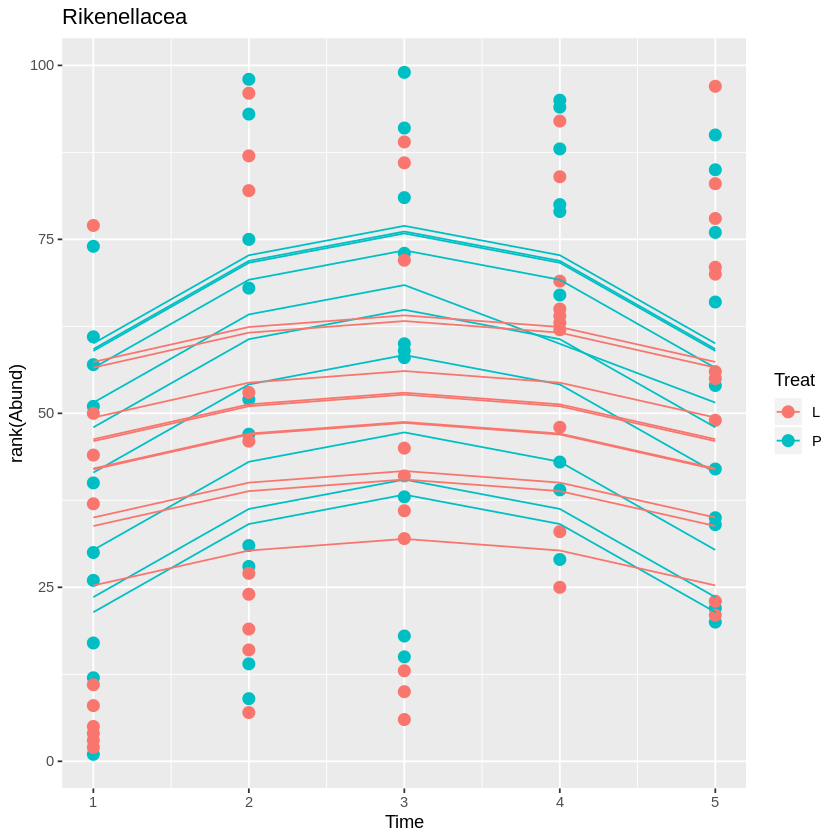

In [35]:
fm_rick <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Rikenellacea, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_rick))
    newdat <- expand.grid(Treat=unique(mylist$Rikenellacea),
                      Time=c(min(mylist$Rikenellacea$Time),
                            max(mylist$Rikenellacea$Time)))


    p_rick <- ggplot(mylist$Rikenellacea, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Rikenellacea") +
          geom_line(aes(y=predict(fm_rick), group=Individual))
    print(p_rick)

## Desulfovibrio

Linear mixed-effects model fit by REML
 Data: mylist$Desulfovibrio 
       AIC      BIC   logLik
  928.2099 948.6409 -456.105

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             21.93547 (Intr)
1 | I((Time - 3)^2)TRUE 22.00761 -0.866
Residual                25.09640       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                           Value Std.Error DF   t-value p-value
(Intercept)             64.48571  6.597014 77  9.774985  0.0000
I((Time - 3)^2)         -3.59286  2.121033 77 -1.693918  0.0943
TreatP                 -13.95767  9.374482 18 -1.488900  0.1538
I((Time - 3)^2):TreatP  -0.47549  3.005663 77 -0.158197  0.8747
 Correlation: 
                       (Intr) I((Tm-3)^2) TreatP
I((Time - 3)^2)        -0.643                   
TreatP                 -0.704  0.453            
I((Time - 3)^2):TreatP  0.454 -0.706      -0.645

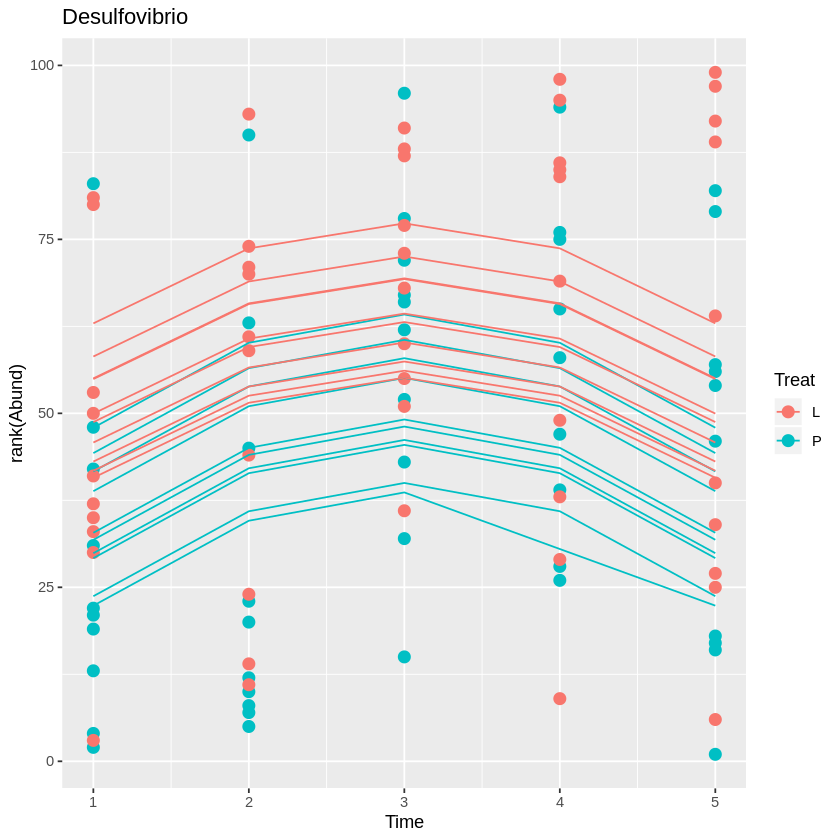

In [36]:
fm_desul <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Desulfovibrio, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_desul))
    newdat <- expand.grid(Treat=unique(mylist$Desulfovibrio),
                      Time=c(min(mylist$Desulfovibrio$Time),
                            max(mylist$Desulfovibrio$Time)))


    p_desul <- ggplot(mylist$Desulfovibrio, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Desulfovibrio") +
          geom_line(aes(y=predict(fm_desul), group=Individual))
    print(p_desul)

In [41]:
# Here is a plot of the bacteria that showed siginificance over time or treatment
pdf("LME_new_all.pdf",width = 10, height = 15)
grid.arrange(p_akker, p_allo, p_bifido,p_copro,p_desul,p_lachno,p_lacto,p_rick,p_rumino,p_s24, ncol = 2, nrow = 5)
dev.off()

png 
  2

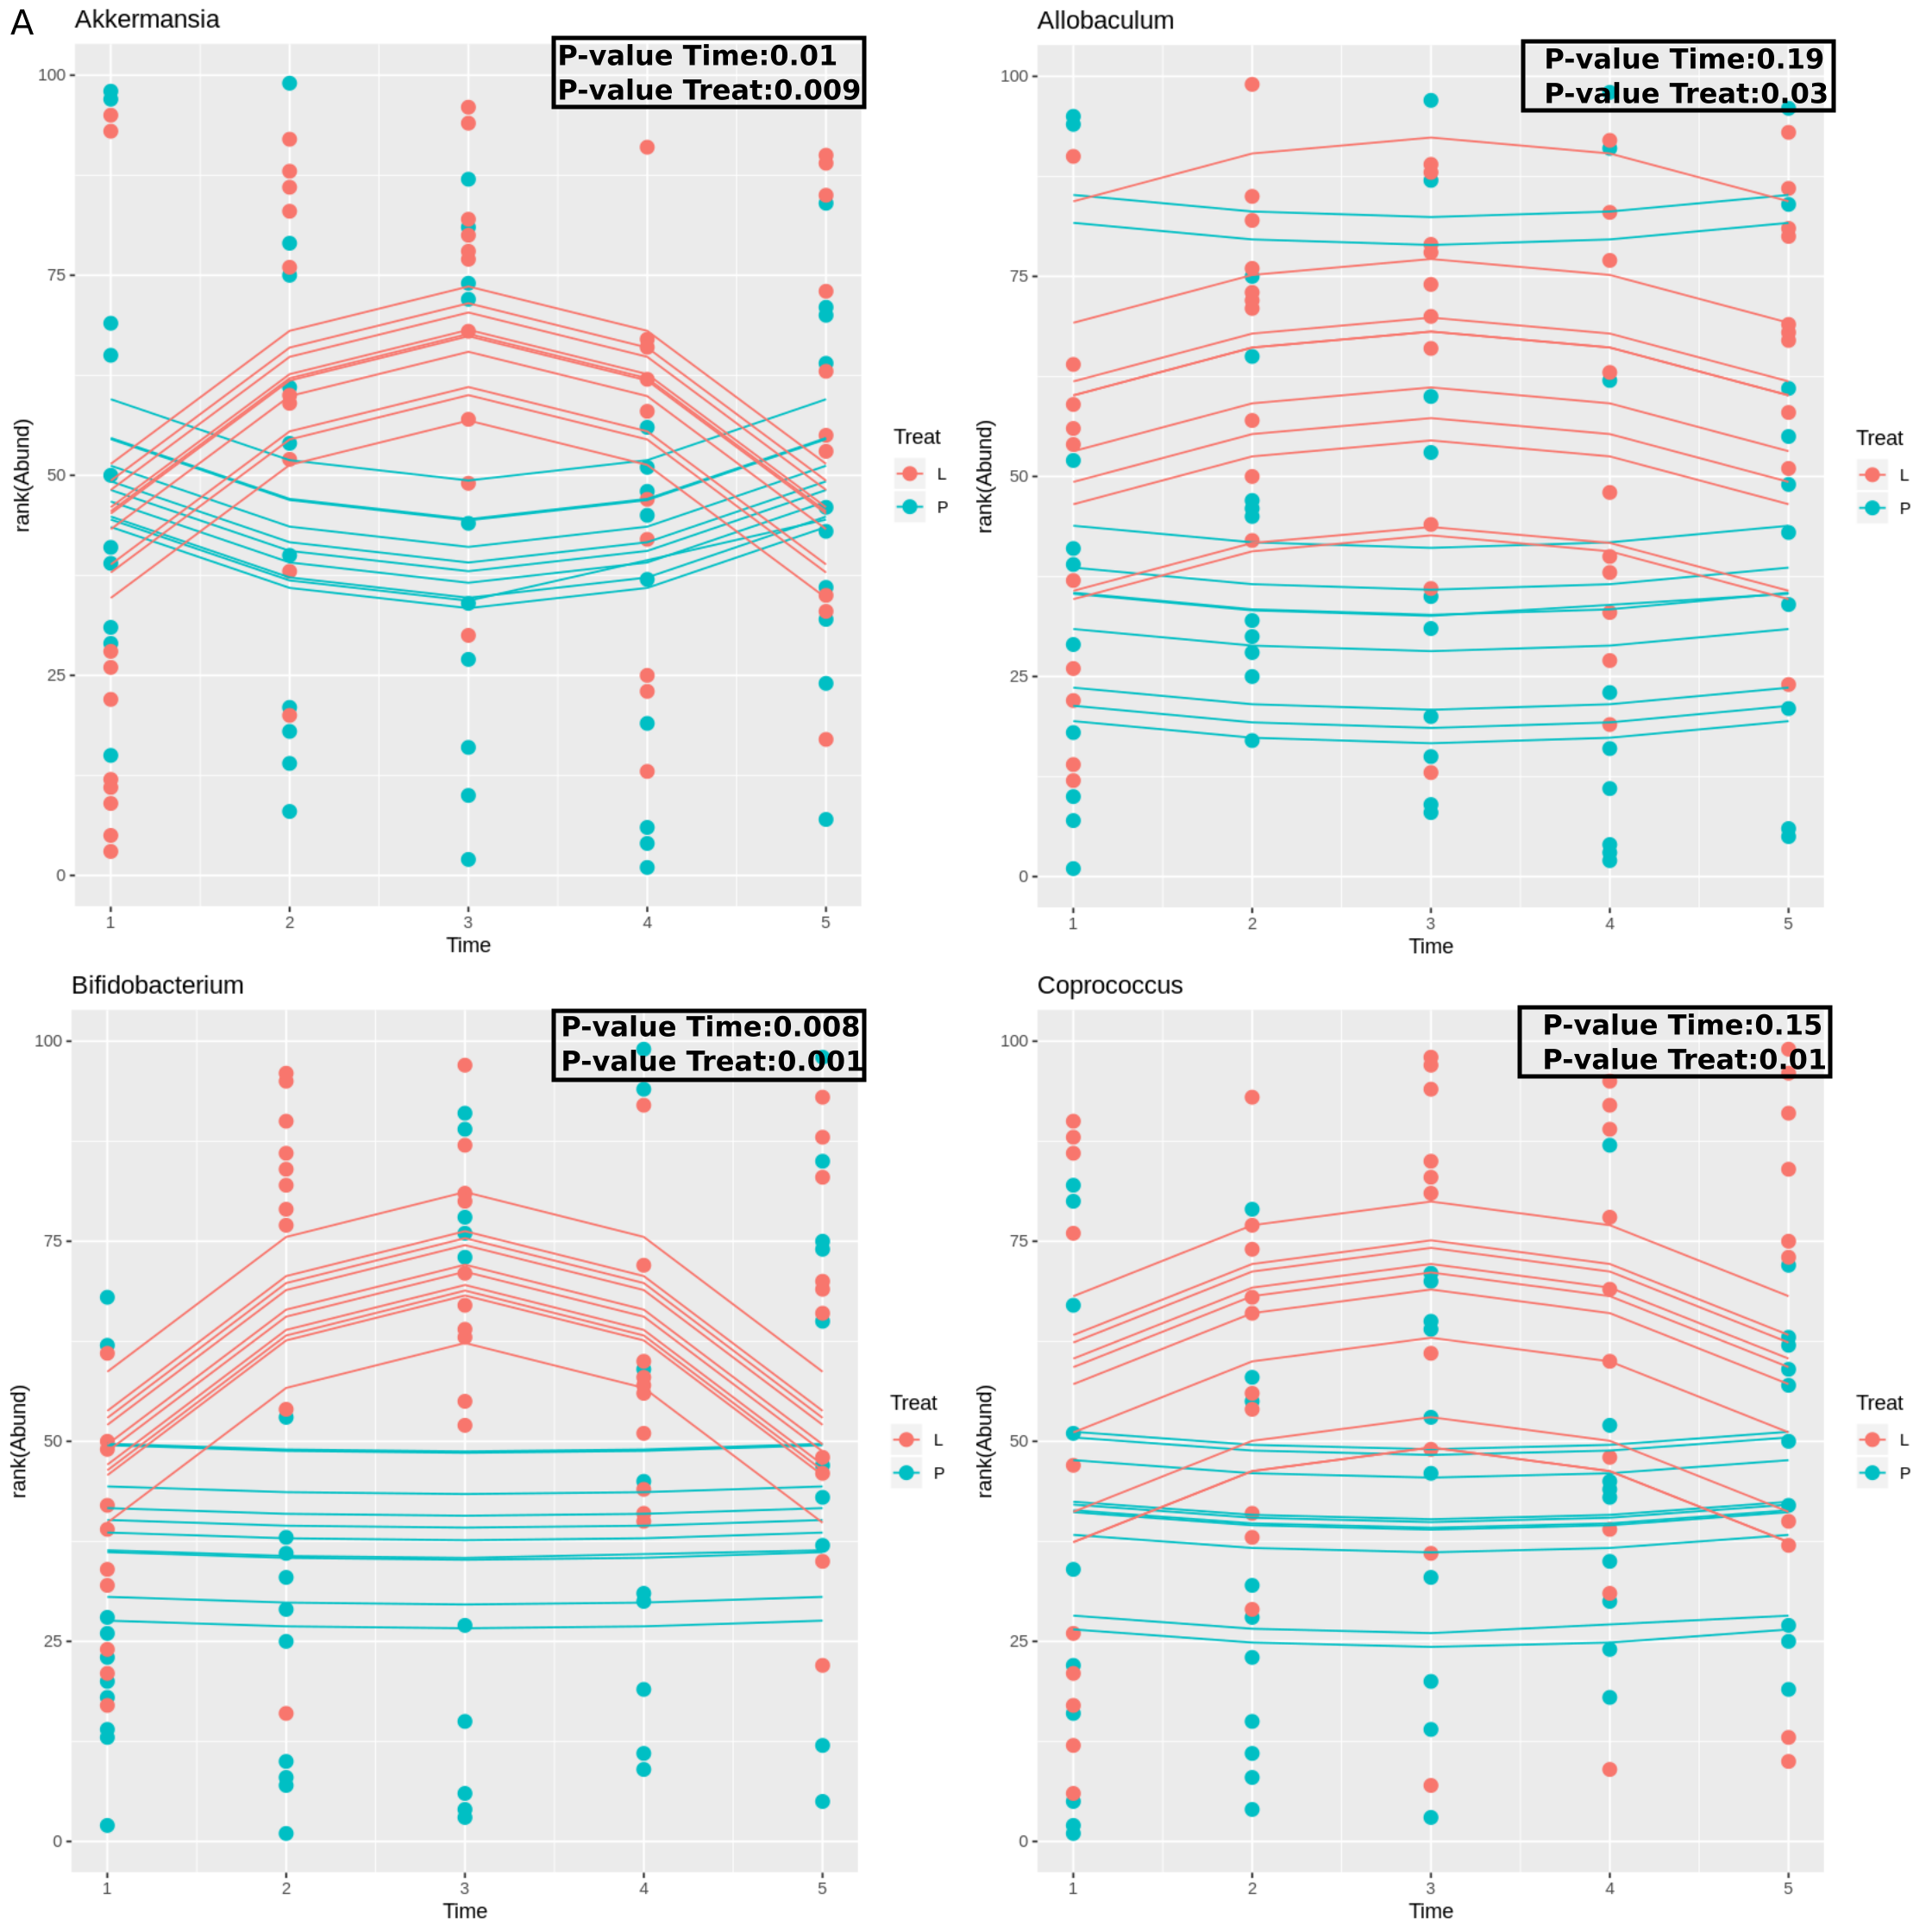